In [72]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from IPython.display import Video
from celluloid import Camera

In [34]:
import numpy as np

def rk4_step(y0, x0, f, h, f_args = {}):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, f_args = {}):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

# Be advised that the integration can take a while for large values of n (e.g >=10^5).

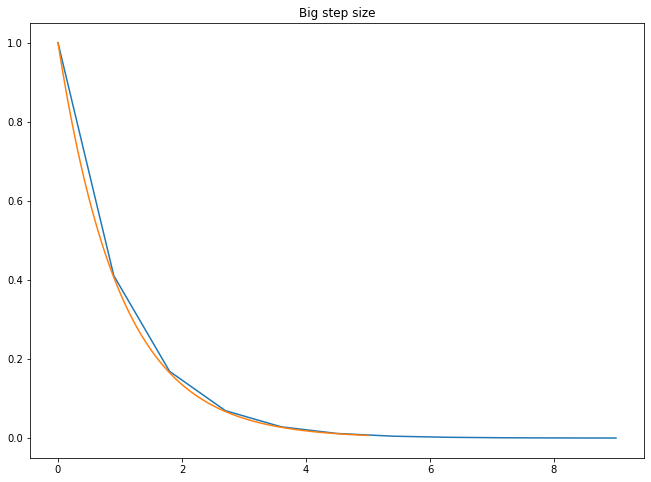

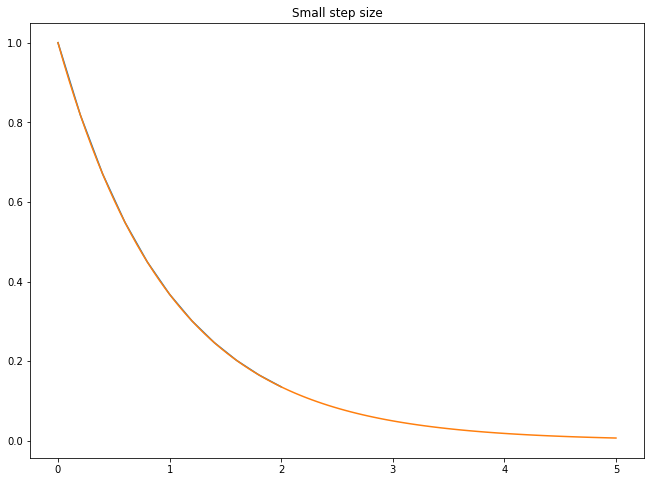

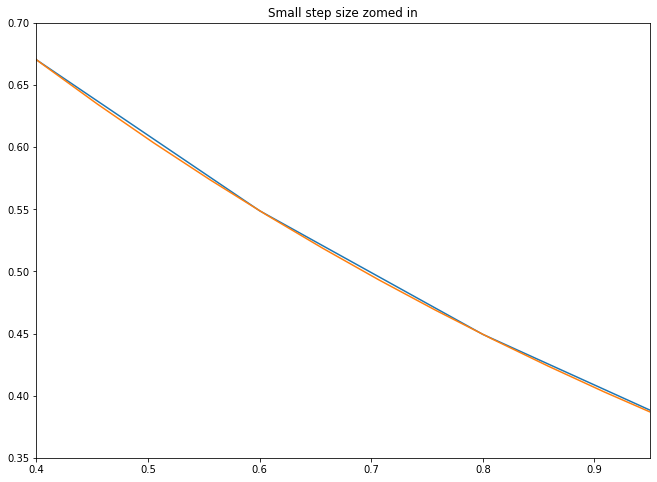

In [65]:
def f(y, x):
    return -y


def so(r, x):
    return np.e**(-x)

x_1 = np.linspace(0, 5, 100)

fig = plt.figure(figsize=(11,8))

y1 , x1=rk4(np.array([1]), 0, f, 0.9, 10)
plt.plot(x1, y1)
plt.plot(x_1, so(1, x_1))
plt.title("Big step size")

fig = plt.figure(figsize=(11,8))


plt.title("Small step size")
y , x=rk4(np.array([1]), 0, f, 0.2, 10)
plt.plot(x, y)
plt.plot(x_1, so(1, x_1))

fig = plt.figure(figsize=(11,8))
plt.title("Small step size zomed in")
plt.ylim(0.35, 0.7)
plt.xlim(0.4, 0.95)
plt.plot(x, y)
plt.plot(x_1, so(1, x_1))




###### def rk4_step(f,h,y0,x0):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0)
    k2 = h * f(y0 + k1/2., x0 + h/2.)
    k3 = h * f(y0 + k2/2., x0 + h/2.)
    k4 = h * f(y0 + k3, x0 + h)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)


In [36]:
#Functions for Coordinates of the 1st body
def f_1x(x1, x2, x3, y1, y2, y3):
    return G*m2*(x2-x1)/(np.sqrt((x2-x1)**2+(y2-y1)**2))**3 + G*m3*(x3-x1)/(np.sqrt((x3-x1)**2+(y3-y1)**2))**3 
def f_1y(x1, x2, x3, y1, y2, y3):
    return G*m2*(y2-y1)/(np.sqrt((x2-x1)**2+(y2-y1)**2))**3 + G*m3*(y3-y1)/(np.sqrt((x3-x1)**2+(y3-y1)**2))**3 

#Functions for Coordinates of the 2snd body
def f_2x(x1, x2, x3, y1, y2, y3):
    return G*m1*(x1-x2)/(np.sqrt((x1-x2)**2+(y1-y2)**2))**3  + G*m3*(x3-x2)/(np.sqrt((x3-x2)**2+(y3-y2)**2))**3 
def f_2y(x1, x2, x3, y1, y2, y3):
    return G*m1*(y1-y2)/(np.sqrt((x1-x2)**2+(y1-y2)**2))**3  + G*m3*(y3-y2)/(np.sqrt((x3-x2)**2+(y3-y2)**2))**3 

#Functions for Coordinates of the 3rd body
def f_3x(x1, x2, x3, y1, y2, y3):
    return G*m2*(x2-x3)/(np.sqrt((x2-x3)**2+(y2-y3)**2))**3  + G*m1*(x1-x3)/(np.sqrt((x1-x3)**2+(y1-y3)**2))**3 
def f_3y(x1, x2, x3, y1, y2, y3):
    return G*m2*(y2-y3)/(np.sqrt((x2-x3)**2+(y2-y3)**2))**3  + G*m1*(y1-y3)/(np.sqrt((x1-x3)**2+(y1-y3)**2))**3 




In [37]:
#Function for the Runge-Kutta calculation
#Calculates the acceleration and shifts the velocity to the position index in the pos_vel array
def f_1(pos_vel, x0):
    a_x1 = f_1x(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_x2 = f_2x(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_x3 = f_3x(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_y1 = f_1y(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_y2 = f_2y(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_y3 = f_3y(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    vel_acc_step = np.array([pos_vel[1], a_x1, pos_vel[3], a_x2, pos_vel[5], a_x3, pos_vel[7], a_y1,pos_vel[9], a_y2,pos_vel[11], a_y3])
    return vel_acc_step



In [38]:
def calc(x_max, x0, pos_vel):
    while x0 < x_max:
        POS_VEL.append(pos_vel)
        X0.append(x0)
        pos_vel, x0 = rk4_step(np.array(pos_vel), x0, f_1, h)
    #Turns pos_vel array into 1D arrays for individual x and y coordinates
    x1list = []
    x2list = [] 
    x3list = [] 
    y1list = [] 
    y2list = []
    y3list = [] 
    for i in POS_VEL:
        x1list.append(i[0])
        x2list.append(i[2])
        x3list.append(i[4])
        y1list.append(i[6])
        y2list.append(i[8])
        y3list.append(i[10])
    return x1list, y1list, x2list, y2list, x3list, y3list

In [39]:
#Start and end of calculation
x0 = 0
x_max = 6.4

#Stepsize
h = 0.01
#Masses of bodies
m1 = 1
m2 = 1
m3 = 1
#Gravitational constant
G = 1

#Starting positions and velocities
x1,  y1 = -0.97000436,  0.24308753
vx1, vy1 = -0.46620368, -0.43236573

x2,  y2 =  0.97000436, -0.24308753
vx2, vy2 = -0.46620368, -0.43236573

x3,  y3 = 0.0,        0.0
vx3, vy3 = 0.93240737, 0.86473146

#Holds all calculated positions and velocities 
POS_VEL = []
#Holds all timesteps
X0 = []
#One array to combine all positions and velocities of the three bodies
pos_vel=np.array([x1,vx1,x2,vx2,x3,vx3,y1,vy1,y2,vy2,y3,vy3])






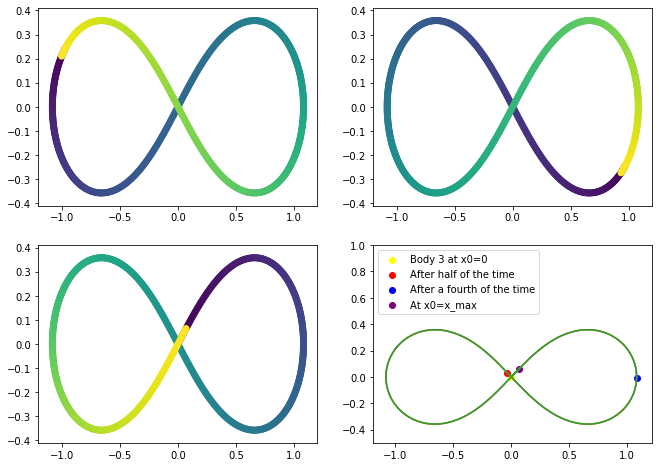

In [40]:
#calculate
x1list, y1list, x2list, y2list, x3list, y3list = calc(x_max, x0, pos_vel)


#plot
fig = plt.figure(figsize=(11,8))

#Plot body 1
ax1=plt.subplot(2,2,1)
ax1.scatter(x1list, y1list, c=X0)

#PLot body 2
ax2=plt.subplot(2,2,2)
ax2.scatter(x2list, y2list, c=X0)

#PLot body 3
ax3=plt.subplot(2,2,3)
ax3.scatter(x3list, y3list, c=X0)

ax4=plt.subplot(2,2,4)
ax4.plot(x1list, y1list)
ax4.plot(x2list, y2list)
ax4.plot(x3list, y3list)
ax4.set_ylim(-0.5, 1)
ax4.scatter(x3, y3, c="yellow", label="Body 3 at x0=0")
ax4.scatter(x3list[int(len(x3list)/2)], y3list[int(len(x3list)/2)], c="red", label="After half of the time")
ax4.scatter(x3list[int(len(x3list)/4)], y3list[int(len(x1list)/4)], c="blue", label="After a fourth of the time")
ax4.scatter(x3list[-1], y3list[-1], c="purple", label="At x0=x_max")
ax4.legend(loc='upper left')

In [69]:
Video("Anim_plot.mp4")

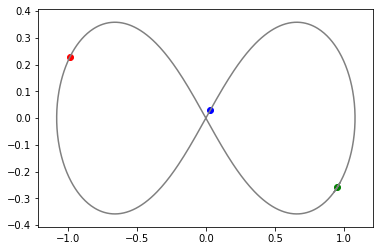

In [44]:
#Start and end of calculation
x0 = 0
x_max = 10

#Stepsize
h = 0.00001
#Masses of bodies
m1 = 3.
m2 = 4.
m3 = 5.
#Gravitational constant
G = 1

#Starting positions and velocities
x1,  y1  =  4.0, -3.0
vx1, vy1 =  0.0,  0.0

x2,  y2  =  0.0,   0.0
vx2, vy2 =  0.0,   0.0

x3,  y3  =  0.0,  -3.0
vx3, vy3 =  0.0,   0.0

#Holds all calculated positions and velocities 
POS_VEL = []
#Holds all timesteps
X0 = []
#One array to combine all positions and velocities of the three bodies
pos_vel=np.array([x1,vx1,x2,vx2,x3,vx3,y1,vy1,y2,vy2,y3,vy3])

x1list, y1list, x2list, y2list, x3list, y3list = calc(x_max, x0, pos_vel)
M = m1+m2+m3


/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


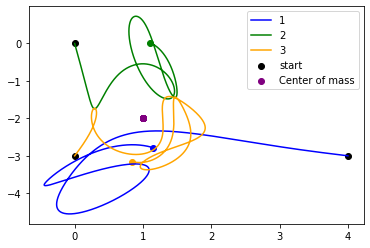

In [45]:
x_center_of_mass = np.array((m1*np.array(x1list))+(m2*np.array(x2list))+(m3*np.array(x3list)))*1/M
y_center_of_mass = np.array((m1*np.array(y1list))+(m2*np.array(y2list))+(m3*np.array(y3list)))*1/M
#np.array(x1list)[0]

plt.scatter(x1, y1, color="black", label="start")
plt.scatter(x_center_of_mass, y_center_of_mass, color="purple", label="Center of mass")
plt.scatter(x2, y2, color="black")
plt.scatter(x3, y3, color="black")
plt.plot(x1list, y1list, color="blue", label="1")
plt.plot(x2list, y2list, color="green", label="2")
plt.plot(x3list, y3list, color="orange", label="3")
plt.scatter(x1list[-1], y1list[-1], color="blue")
plt.scatter(x2list[-1], y2list[-1], color="green")
plt.scatter(x3list[-1], y3list[-1], color="orange")
plt.legend()

In [71]:
"""

animarrayx1 = x1list[::1000]
animarrayy1 = y1list[::1000]
animarrayx2 = x2list[::1000]
animarrayy2 = y2list[::1000]
animarrayx3 = x3list[::1000]
animarrayy3 = y3list[::1000]
camera = Camera(plt.figure())
for i in range(int(len(animarrayx1)/10)):
    plt.scatter(x1, y1, color="black", label="start")
    plt.scatter(x_center_of_mass, y_center_of_mass, color="purple", label="Center of mass")
    plt.scatter(x2, y2, color="black")
    plt.scatter(x3, y3, color="black")
    plt.plot(animarrayx1, animarrayy1, color="grey")
    plt.plot(animarrayx2, animarrayy2, color="grey")
    plt.plot(animarrayx3, animarrayy3, color="grey")
    plt.scatter(animarrayx1[i*10], animarrayy1[i*10], color="blue")
    plt.scatter(animarrayx2[i*10], animarrayy2[i*10], color="green")
    plt.scatter(animarrayx3[i*10], animarrayy3[i*10], color="red")
    camera.snap()
anim = camera.animate(blit=True)
anim.save('Plot_chaotic.mp4')
print("DONE")

"""

'\n\nanimarrayx1 = x1list[::1000]\nanimarrayy1 = y1list[::1000]\nanimarrayx2 = x2list[::1000]\nanimarrayy2 = y2list[::1000]\nanimarrayx3 = x3list[::1000]\nanimarrayy3 = y3list[::1000]\ncamera = Camera(plt.figure())\nfor i in range(int(len(animarrayx1)/10)):\n    plt.scatter(x1, y1, color="black", label="start")\n    plt.scatter(x_center_of_mass, y_center_of_mass, color="purple", label="Center of mass")\n    plt.scatter(x2, y2, color="black")\n    plt.scatter(x3, y3, color="black")\n    plt.plot(animarrayx1, animarrayy1, color="grey")\n    plt.plot(animarrayx2, animarrayy2, color="grey")\n    plt.plot(animarrayx3, animarrayy3, color="grey")\n    plt.scatter(animarrayx1[i*10], animarrayy1[i*10], color="blue")\n    plt.scatter(animarrayx2[i*10], animarrayy2[i*10], color="green")\n    plt.scatter(animarrayx3[i*10], animarrayy3[i*10], color="red")\n    camera.snap()\nanim = camera.animate(blit=True)\nanim.save(\'Plot_chaotic.mp4\')\nprint("DONE")\n\n'

In [70]:
Video("PLot_chaotic.1.mp4")